<a href="https://colab.research.google.com/github/SargisGasparyan/MyRpojectN1/blob/master/Milestone2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [0]:
data=pd.read_csv(r'/content/drive/My Drive/train.csv',encoding='latin')

In [11]:
data.shape

(8888, 16)

In [12]:
data.columns

Index(['ID', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'target'],
      dtype='object')

In [13]:
data.dtypes

ID                  int64
age                 int64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week    float64
native-country     object
target            float64
dtype: object

In [14]:
data.describe()

,ID,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target
count,8888.000000,8888.000000,8.888000e+03,8888.000000,8887.000000,8887.000000,8887.000000,8887.000000
mean,16261.658641,38.515189,1.901110e+05,10.094509,1153.162147,77.629571,40.581411,0.237763
std,9402.796951,13.649390,1.066818e+05,2.552005,8004.182695,384.102157,12.619516,0.425737
min,3.000000,17.000000,1.487800e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,8157.750000,28.000000,1.175005e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,16191.000000,37.000000,1.787440e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,24472.500000,47.000000,2.365498e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,32560.000000,90.000000,1.268339e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


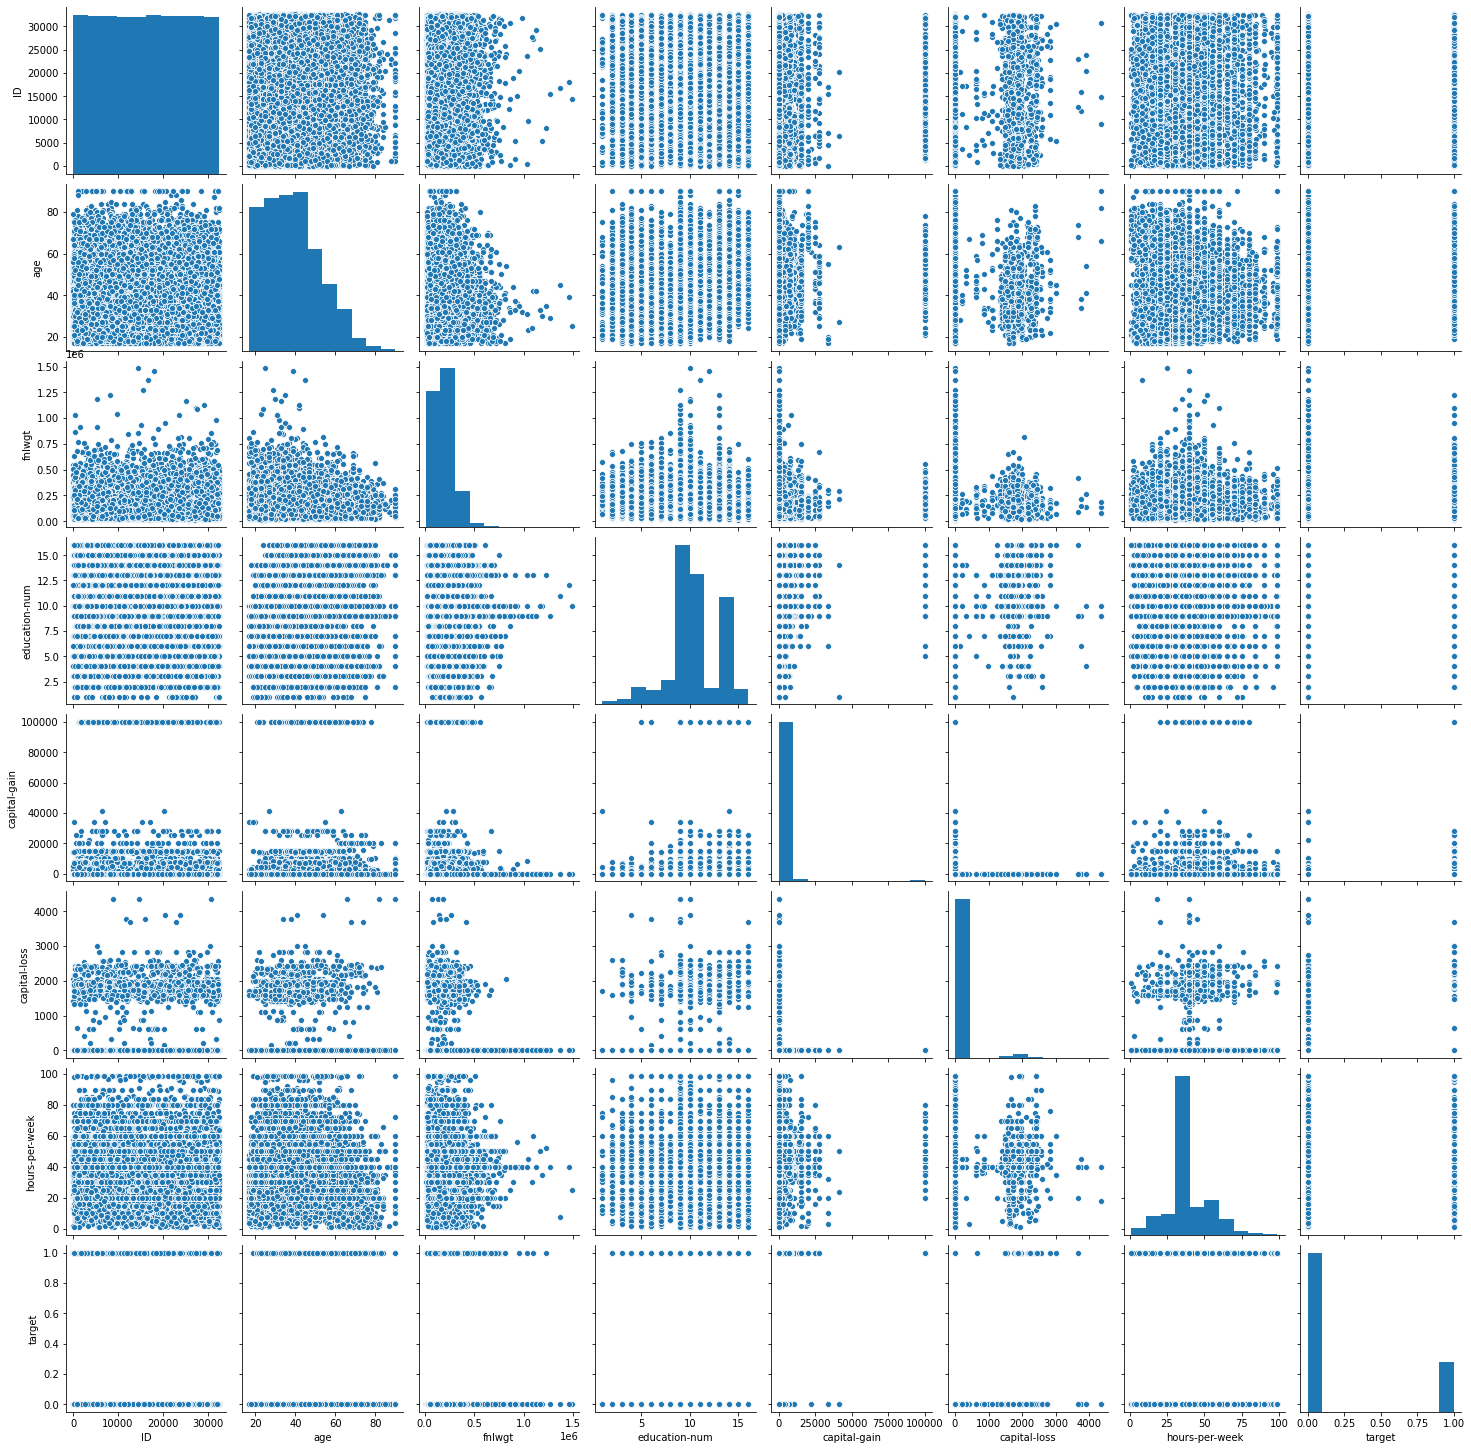

In [0]:
sns.pairplot(data)

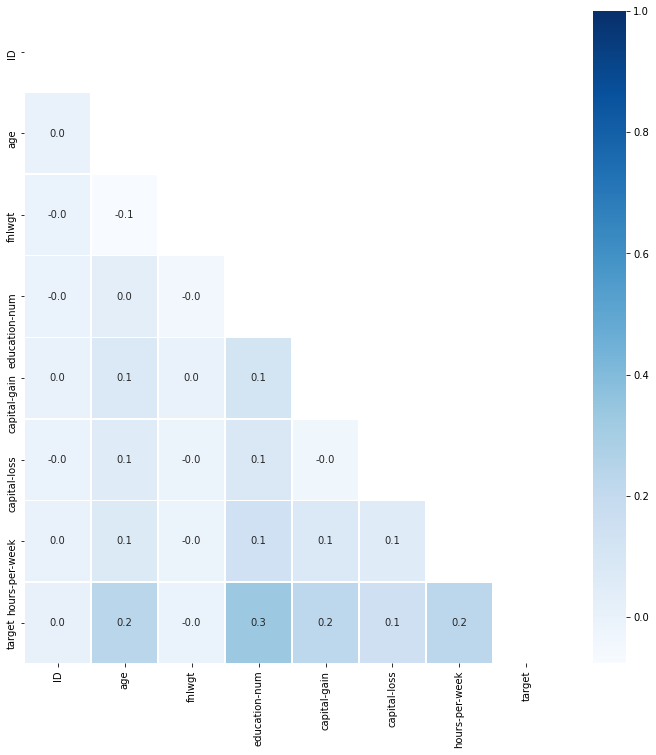

In [0]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show() 

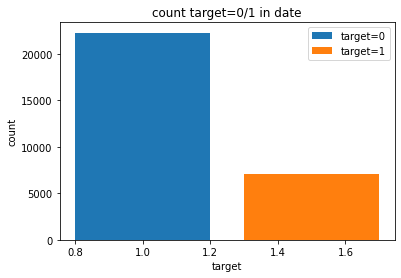

In [0]:
plt.bar(1, len(data.loc[data.target==0]), width = 0.4)
plt.bar(1.5, len(data.loc[data.target==1]), width = 0.4)
plt.xlabel('target')
plt.ylabel('count')
plt.title('count target=0/1 in date')
plt.legend(['target=0','target=1'])

In [0]:
data.workclass.value_counts()

 Private             20425
 Self-emp-not-inc     2299
 Local-gov            1874
 ?                    1630
 State-gov            1177
 Self-emp-inc         1015
 Federal-gov           864
 Without-pay            13
 Never-worked            7
Name: workclass, dtype: int64

Text(0.5, 1.0, 'count target 0/1 for sex')

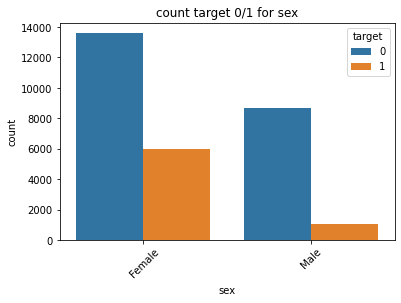

In [0]:
x=sns.countplot(x = 'sex',data = data,hue='target',order = data['sex']
              .value_counts().sort_values(ascending=False).head(10).index)
x.set_xticklabels(labels=data.sex.unique(),rotation=45)
plt.title('count target 0/1 for sex')

Text(0.5, 1.0, 'count target 0/1 for occupation')

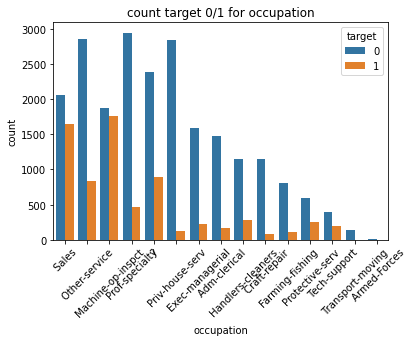

In [0]:
x=sns.countplot(x = 'occupation',data = data,hue='target',order = data['occupation']
              .value_counts().sort_values(ascending=False).index)
x.set_xticklabels(labels=data['occupation'].unique(),rotation=45)
plt.title('count target 0/1 for occupation')

Text(0.5, 1.0, 'count target 0/1 for sex')

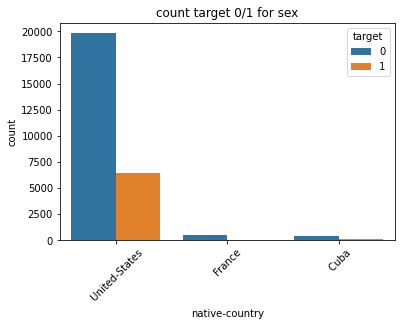

In [0]:
x=sns.countplot(x = 'native-country',data = data,hue='target',order = data['native-country']
              .value_counts().sort_values(ascending=False).head(3).index)
x.set_xticklabels(labels=data['native-country'].unique(),rotation=45)
plt.title('count target 0/1 for sex')

In [0]:
data=data.drop(columns=['education','ID'])


In [0]:
countmartial=data['marital-status'].value_counts()
countmartial
data.loc[data['marital-status'].isin(countmartial[countmartial<13485].index), "marital-status"]="Other"
data['marital-status']=[0 if i == ' Married-civ-spouse' else 1 for i in data['marital-status']]
data['marital-status'].value_counts()

In [0]:
countoccupation=data.occupation.value_counts()
data.loc[data['occupation'].isin(countoccupation[countoccupation<3277].index), "occupation"]="Other"
metocup={'Other':0,' Prof-specialty':1,' Craft-repair':2,' Exec-managerial':3,' Adm-clerical':4,' Sales':5}
data['occupation']=data['occupation'].map(metocup)

In [0]:
counteducation=data['education-num'].value_counts()
counteducation
data.loc[data['education-num'].isin(counteducation[counteducation<1245].index), "education-num"]="Other"
meted={'Other':0, 9:1,10:2,13:3,14:4,11:5}
data['education-num']=data['education-num'].map(meted)
data['education-num'].value_counts()

In [0]:
countrelat=data.relationship.value_counts()
data.loc[data['relationship'].isin(countrelat[countrelat<7454].index), "relationship"]="Other"
metrel={' Husband':0,' Not-in-family':2,'Other':3}
data['relationship']=data['relationship'].map(metrel)

In [0]:
countnative=data['native-country'].value_counts()
countnative
data.loc[data['native-country'].isin(countnative[countnative<26239].index), " United-States"]="Other"
data['native-country']=[0 if i == ' United-States' else 1 for i in data['native-country']]

In [0]:
data['race']=[0 if i == ' White' else 1 for i in data.race]

In [0]:
data['sex']=[0 if i == ' Female' else 1 for i in data.sex]

In [0]:
data=data.drop(columns=[' United-States'])

In [0]:
data['workclass']=data['workclass'].astype('str')
data['occupation']=data['occupation'].astype('str')
data['marital-status']=data['marital-status'].astype('str')
data['relationship']=data['relationship'].astype('str')
data['race']=data['race'].astype('str')
data['sex']=data['sex'].astype('str')
data['native-country']=data['native-country'].astype('str')
data['education-num']=data['education-num'].astype('str')


In [0]:
x=pd.get_dummies(data[['workclass','occupation','marital-status','relationship','race','sex','education-num','native-country']])

In [0]:
x

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,occupation_0,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,marital-status_0,marital-status_1,relationship_0,relationship_2,relationship_3,race_0,race_1,sex_0,sex_1,education-num_0,education-num_1,education-num_2,education-num_3,education-num_4,education-num_5,native-country_0,native-country_1
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0
1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29299,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
29300,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0
29301,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0
29302,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0


In [0]:
data = data.join(x)
data.drop(['workclass', 'occupation', 'marital-status','relationship','race','sex','education-num','native-country'], axis=1, inplace=True)


In [0]:
data

,ID,age,fnlwgt,capital-gain,capital-loss,hours-per-week,target,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,occupation_0,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,marital-status_0,marital-status_1,relationship_0,relationship_2,relationship_3,race_0,race_1,sex_0,sex_1,education-num_0,education-num_1,education-num_2,education-num_3,education-num_4,education-num_5,native-country_0,native-country_1
0,6010,35,189916,0,0,30,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0
1,4461,20,284737,0,0,20,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0
2,8762,34,37380,0,0,40,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0
3,26437,34,252646,7298,0,50,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
4,2952,22,35448,0,0,22,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29299,29802,47,359461,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
29300,5390,31,147215,0,0,21,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0
29301,860,18,216284,0,0,20,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0
29302,15795,50,54261,0,0,84,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0


In [0]:
data.to_csv('analisdata.csv')


In [0]:
data=pd.read_csv(r'/content/drive/My Drive/analisdata.csv',encoding='latin')
data=data.drop(columns='Unnamed: 0')
data

,ID,age,fnlwgt,capital-gain,capital-loss,hours-per-week,target,workclass_0,workclass_1,occupation_0,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,marital-status_0,marital-status_1,relationship_0,relationship_2,relationship_3,race_0,race_1,sex_0,sex_1,education-num_0,education-num_1,education-num_2,education-num_3,education-num_4,education-num_5,native-country_0,native-country_1
0,6010,35,189916,0,0,30,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0
1,4461,20,284737,0,0,20,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0
2,8762,34,37380,0,0,40,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0
3,26437,34,252646,7298,0,50,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
4,2952,22,35448,0,0,22,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29299,29802,47,359461,0,0,40,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
29300,5390,31,147215,0,0,21,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0
29301,860,18,216284,0,0,20,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0
29302,15795,50,54261,0,0,84,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0


In [0]:
data=pd.read_csv(r'/content/drive/My Drive/analisdata.csv',encoding='latin')
data=data.drop(columns='Unnamed: 0')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
target=data['target']
data=data.drop(columns='target')

(trainData, 
 testData, 
 train_label, 
 test_label) = train_test_split(data,
                                target,
                                test_size=0.2, 
                                random_state=56428234)
rf_model = RandomForestClassifier(max_depth=11,max_features=None,n_estimators=95)
rf_model.fit(trainData, train_label)
preds = rf_model.predict(testData)
f1_score(test_label, preds, average='micro')


0.8556560313939601

In [0]:
test = pd.read_csv('/content/drive/My Drive/test.csv')


In [0]:
countworkclass=test.workclass.value_counts()
test.loc[test['workclass'].isin(countworkclass[countworkclass<2271].index), "workclass"]="Other"
test['workclass']=[0 if i == ' Private' else 1 for i in test.workclass]
test['workclass'].value_counts()

0    2271
1     986
Name: workclass, dtype: int64

In [0]:
countmartial=test['marital-status'].value_counts()
test.loc[test['marital-status'].isin(countmartial[countmartial<1491].index), "marital-status"]="Other"
test['marital-status']=[0 if i == ' Married-civ-spouse' else 1 for i in test['marital-status']]
test['marital-status'].value_counts()

1    1766
0    1491
Name: marital-status, dtype: int64

In [0]:
countoccupation=test.occupation.value_counts()
test.loc[test['occupation'].isin(countoccupation[countoccupation<362].index), "occupation"]="Other"
metocup={'Other':0,' Prof-specialty':1,' Craft-repair':2,' Exec-managerial':3,' Adm-clerical':4,' Sales':5}
test['occupation']=test['occupation'].map(metocup)


In [0]:
counteducation=test['education-num'].value_counts()
counteducation
test.loc[test['education-num'].isin(counteducation[counteducation<137].index), "education-num"]="Other"
meted={'Other':0, 9:1,10:2,13:3,14:4,11:5}
test['education-num']=test['education-num'].map(meted)


In [0]:
countrelat=test.relationship.value_counts()
countrelat
test.loc[test['relationship'].isin(countrelat[countrelat<851].index), "relationship"]="Other"
metrel={' Husband':0,' Not-in-family':2,'Other':3}
test['relationship']=test['relationship'].map(metrel)


In [0]:

test['race']=[0 if i == ' White' else 1 for i in test.race]
test['sex']=[0 if i == ' Female' else 1 for i in test.sex]

In [0]:
countnative=test['native-country'].value_counts()
countnative
test.loc[test['native-country'].isin(countnative[countnative<2931].index), " United-States"]="Other"
test['native-country']=[0 if i == ' United-States' else 1 for i in test['native-country']]


In [0]:
test['workclass']=test['workclass'].astype('str')
test['occupation']=test['occupation'].astype('str')
test['marital-status']=test['marital-status'].astype('str')
test['relationship']=test['relationship'].astype('str')
test['race']=test['race'].astype('str')
test['sex']=test['sex'].astype('str')
test['native-country']=test['native-country'].astype('str')
test['education-num']=test['education-num'].astype('str')


In [0]:
y=pd.get_dummies(test[['workclass','occupation','marital-status','relationship','race','sex','education-num','native-country']])

In [0]:
test = test.join(y)
test.drop(['workclass', 'occupation', 'marital-status','relationship','race','sex','education-num','native-country','education',' United-States'], axis=1, inplace=True)


In [0]:
submission_preds = rf_model.predict(test)
test['target'] = submission_preds
test[['ID','target']].to_csv('submission.csv',index = False )